# 1. Introduction + Data analysis + Data Extraction + Cleaning & visualization

<code style="background:yellow;color:black"><b><u><font size="5">1.1 INTRODUCTION:</font></u></b></code>Given dataset is a subset of larger database provided by IMDB. It has different  informations about movies from 1980 till 2020. It consist of 22 different attributes with 222569 observations in total. Major given attributes are a *unique IMDB movie ID*, *rating*, *date of release*, *origin of movie*, *writer*, *movie star*, *director name*, *budget*, *revenue*, and *runtime* of movie.

In [1]:
from IMDB_Helper import *  # in this .py file, we have all reuiqred libraries and basic operations to reduce report length.
import IMDB_Functions # in this .py file, we have all the self defined functions for this project.
df_IMDB=pd.read_csv('Comprehensive IMDb Data.csv'); df=df_IMDB.copy()

<code style="background:yellow;color:black"><b><u><font size="5">1.2 INITIAL ANALYSIS:</font></u></b></code> Apart from above description, our dataset has number of issues to deal with. For example, **multiple and wrong title IDs**. as an example, Movie name <u>Titanic</u> has 7 different IDs, but only one of them is accurate. <u><i>it is very important for us to filter only true (accurate) ID of movie, because we will use this ID to extract more information from IMDB API and other datasets provided by IMDB</i></u>. **Movies with same title are released in different years**, for example Venom was released in 1981, 2005 and 2018, they must be handled carefully. **Missing values** etc. We need only one row against a unique movie with accurate unique ID.

[Click here to view/check our step by step analysis and rectification process in an online appendices notebook](https://github.com/Sanaullah-nahk/IMDB_42577_Project/blob/main/appendices%20notebook%20_%20IMDB%20Project.ipynb "step by step Jupyter notebook")

In [2]:
# keep rows where  year_title_star == year_title_primaryName , remove all other rows. 
df = IMDB_Functions.IMDB_match_star_and_primaryName(df)  

Now, do we have any duplicate values in  Year_title ? =   True
Total number of duplicates in year_title =   214


In [3]:
# for above 214 duplicates, copy titleID from IMDB API,  keep the rows where titleID == ID from API, remove rest.
df=IMDB_Functions.IMDB_match_titleID_with_IMDB_API(df) #*** Command run time is 3 min. as its accessing IMDB API for 214 values

Shape of dataframe is further reduced to =  (7163, 27)
Total number of duplicates in  year_title  =   0


<code style="background:yellow;color:black"><b><u><font size="5">1.3 FURTHER DATA EXTRACTION FROM OTHER IMDB DATABASES:</font></u></b></code>  For further data extraction we have used three other databases provided by IMDB itself. They can be downloaded from follwing links [name.basics.tsv.gz](https://datasets.imdbws.com/name.basics.tsv.gz "Download, unzip and rename it to name.basics"), [title.basics.tsv.gz](https://datasets.imdbws.com/title.basics.tsv.gz "Download, unzip and rename it to title.basics") and [title.ratings.tsv.gz](https://datasets.imdbws.com/title.ratings.tsv.gz "Download, unzip and rename it to title.ratings"). from these datasets, we have extracted **3 main genres**,  **age of actor at the time of movie release** and **No. of voters** for each movie. Along these, we have also **converted countries into continents**, total **number of actors, actress and director**s and **make 5 years groups** for all years from 1980 till 2020.

In [4]:
df=pd.read_csv('NB_1_result_IMDB_UniqueID_10Nov21.csv') # results from Analysis section (True Movie ID)
df=IMDB_Functions.extract_3_geners_from_IMDB(df,IMDB_title_basics="title.basics.tsv") #Extract upto.3 main geners for each movie
df=IMDB_Functions.countru_to_continent(df) # convert country column to continent (China = Asia) ** install "pycountry_convert"
df=IMDB_Functions.extract_age_of_actor(df, IMDB_data="name.basics.tsv") # Extract age of star at the time of release.
df=IMDB_Functions.extract_No_of_voters(df,IMDB_data3="title.ratings.tsv") # Extract total No. of voters for each movie.
df=IMDB_Functions.sum_of_stars(df,df_IMDB) # count No. of actor, actress and directors from primaryName column for each Movie.
df=IMDB_Functions.group_year_column(df) #make 5 years group for years column >> 1999 = "1995-2000" and 2007 = "2005-2010"

<code style="background:yellow;color:black"><b><u><font size="5">1.4 DATA CLEANING AND VISUALIZATIONS:</font></u></b></code> Our dataset has a lot of missing values. Upon analysis, we found that gross has very strong corelation with budget, but budget is missing for 1893 unique observations. we can extract these values from IMDB API, they are in different foreign currencies. But processing 1893 value through two different APIs are highly time consuming, so we will drop those entries. We also have some extreme values (outliers) on both lower and higher ends. we will replace/ignore some of them. (details are in [appendices notebook](https://github.com/Sanaullah-nahk/IMDB_42577_Project/blob/main/appendices%20notebook%20_%20IMDB%20Project.ipynb "IMDB analysis, step by step Jupyter notebook") in Data cleaning section)

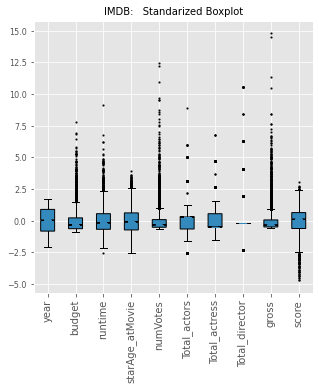

In [5]:
df=pd.read_csv('NB_2_result_IMDB_extractedData_10Nov21.csv'); df=df.dropna() # results from DATA EXTRACTION 
IMDB_Functions.IMDB_boxplot(df) # Standarized Boxplot to get an idea of extream values, lets also cross check by distribution

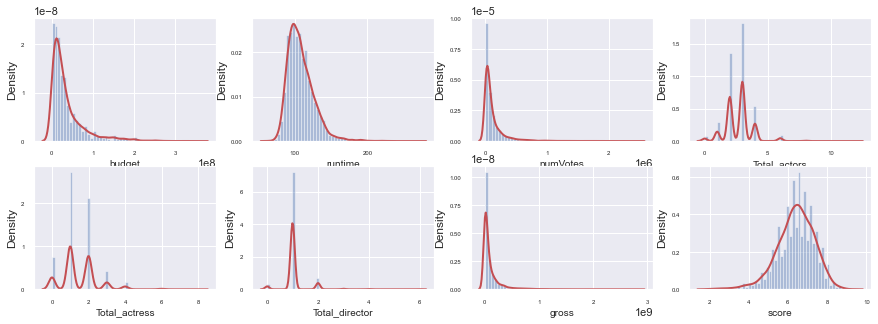

In [6]:
IMDB_Functions.IMDB_dist_PDF(df) # Below spikes confirms our doubt for outliers. Lets process these extream values in next step

In [7]:
df=IMDB_Functions.min_quantile_remove(df, 'gross',0.01, remove=True) # remove  extremely small gross values (>126043.0)
df=IMDB_Functions.max_quantile_replace(df,'gross',0.99, replace=True) # 99.0 Percentile of  gross = 933087697.7 > replaced
df=IMDB_Functions.max_quantile_replace(df,'numVotes',0.99, replace=True) # 99.0  Percentile = 948829.08
df=IMDB_Functions.max_quantile_replace(df,'runtime',0.996, replace=True) # 99.6  Percentile = 185.01
df=IMDB_Functions.max_quantile_replace(df,'budget',0.998, replace=True) # 99.8  Percentile value for  budget  =  250 million
df=IMDB_Functions.remove_other_outliers(df) #replce 0.99 plus percentile with 0.99 percentile value for actors,ctress,director
df=IMDB_Functions.min_quantile_remove(df, 'score',0.001, remove=True) # 0.1  Percentile value for  score  =  2.2
df=IMDB_Functions.max_quantile_replace(df,'score',0.999, replace=True) # 99.9  Percentile value for  score  =  8.8
df.to_csv('NB_3_result_IMDB_cleaned_data_11Nov.csv',index=False) # for just in case:)& check appendices for all detailed steps

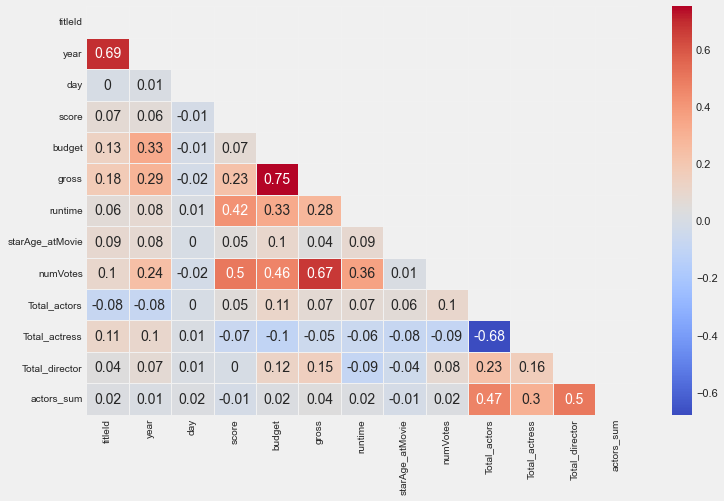

In [8]:
IMDB_Functions.corl_chart(df,x_size=11,y_size=7, font_size=10) # finally, Helpful chart to choose attributes for training.

# 2. Prediction Challenge

In [9]:
df= pd.read_csv('./NB_3_result_IMDB_cleaned_data_11Nov.csv') # Results from Section 1. (analysis and cleaning)

In [10]:
from sklearn.preprocessing import MinMaxScaler; from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split ; from sklearn.linear_model import LinearRegression # 75|25 splits below
from sklearn.cluster import KMeans; from sklearn.metrics import davies_bouldin_score; from sklearn.metrics import silhouette_score

<code style="background:yellow;color:black"><b><u><font size="5">2.1 GROSS PREDICTION:</font></u></b></code> From section 1 we can see on correlation plots that **Gross** has strongest corelation with <i>budget</i> and <i>numVotes</i>, they will contribute majorly in modeling. more over it also has some corelation with <i>year, runtime</i> and <i>scroe</i>, so we are including variables on the bases of correlation plot. Different models were analysed, but finally we have chosen **Linear Regression** to predict Gross, as after testing different models with **10 folds cross validation**, Linear Regression is winner among all. See [appendices notebook](https://github.com/Sanaullah-nahk/IMDB_42577_Project/blob/main/appendices%20notebook%20_%20IMDB%20Project.ipynb "IMDB analysis, step by step Jupyter notebook") for further details for K fold cross validation and model selection.

In [11]:
feature_variables_gross = ['title','year_group','continent', 'budget','runtime','numVotes', "Total_director", 'rating']
target_variable_gross = ['gross'] 
IMDB_gross = df[feature_variables_gross].join(df[target_variable_gross]); IMDB_gross.set_index('title', inplace=True)
IMDB_gross = pd.get_dummies(IMDB_gross, columns =["continent",'year_group', "Total_director", "rating"]) #
scaler = MinMaxScaler() #Standardize
IMDB_gross_st = pd.DataFrame(scaler.fit_transform(IMDB_gross)); IMDB_gross_st.set_index(IMDB_gross.index, inplace=True); IMDB_gross_st.columns = IMDB_gross.columns

In [12]:
y_gross=IMDB_gross_st['gross'] # Y values to predict gross
x_gross=IMDB_gross_st.copy() ; del x_gross['gross'] # X values (independent attributes) to predict gross
x_gross_train,x_gross_test, y_gross_train, y_gross_test=train_test_split(x_gross, y_gross, train_size=0.75,random_state=7)

In [13]:
lr_gross = LinearRegression()  # call model
lr_gross.fit(x_gross_train, y_gross_train) # model fitting
lr_gross_pred = lr_gross.predict(x_gross_test) #Saving predictions
print("R^2 for Linear Regression to predict Gross  : %f" % lr_gross.score(x_gross_test, y_gross_test)) ;print("MAE = %f" % mean_absolute_error(lr_gross_pred, y_gross_test)); print("SMRE = %f" % np.sqrt(mean_squared_error(y_gross_test, lr_gross_pred)))

R^2 for Linear Regression to predict Gross  : 0.729142
MAE = 0.055186
SMRE = 0.089066


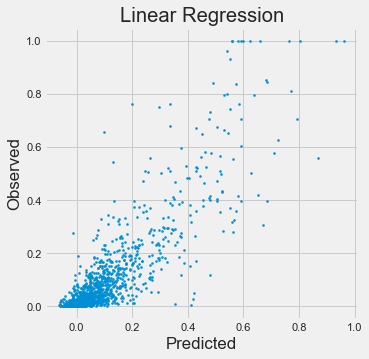

In [19]:
plt.figure(figsize=(5,5));plt.scatter(lr_gross_pred, y_gross_test,s=4); plt.title("Linear Regression"); plt.xlabel("Predicted"); plt.ylabel("Observed");

<code style="background:yellow;color:black"><b><u><font size="5">2.2 SCORE PREDICTION:</font></u></b></code> To predict score we have approached both Regression and Classification, we used two models <i>(both independently)</i> **(1) Linear Regression** and **(2) Random Forest**. The reason for using classification is that Movie score in general is always changing, sometimes almost every day for some movies, usually its not fixed, but the change is very minute and in long term its always between two consecutive numbers, 7.2, 7.4, 7.5.. its between 7 and 7.5 in long term. So we have made 10 groups between 1-10 for score. Model **attributes selection** are again on the bases of correlation. and **model selection** is on the base of 10 folds cross validation results. See [appendices notebook](https://github.com/Sanaullah-nahk/IMDB_42577_Project/blob/main/appendices%20notebook%20_%20IMDB%20Project.ipynb "IMDB analysis, step by step Jupyter notebook") for further details.

<code style="background:yellow;color:black"><b><u><font size="4">2.2.1 Classification</font></u></b></code> To predict score as classification, we have chosen **Random Forest**. <i>(LogisticRegression and DecisionTreeClassifier performed equally as 2nd bets model.) See [appendices notebook](https://github.com/Sanaullah-nahk/IMDB_42577_Project/blob/main/appendices%20notebook%20_%20IMDB%20Project.ipynb "IMDB analysis, step by step Jupyter notebook") for details.

In [20]:
feature_variables_score=['titleId','year_group','continent','budget','runtime','numVotes', 'gross','3_genres', 'score'] # on the bases of correlation.
df2 = df[feature_variables_score] ; df2.set_index('titleId', inplace=True) # make sperate DataFrame just for this model
IMDB_score=pd.get_dummies(df2, columns =['year_group','3_genres','continent']) # get required dummies
IMDB_score_st= pd.DataFrame(scaler.fit_transform(IMDB_score)); IMDB_score_st.set_index(IMDB_score.index, inplace=True); IMDB_score_st.columns=IMDB_score.columns
IMDB_score_st=IMDB_Functions.make_score_groups(IMDB_score)#make score_label for classification i.e score 4.5="4-5", 6.8="6-7", 8.2="8-9" ...

In [21]:
y_score = IMDB_score_st['score_label']  # classification labels
x_score = IMDB_score_st.copy();del x_score['score'] ;del x_score['score_label']  #independent X variables for test and train (X)

In [22]:
x_score_train,x_score_test,y_score_train,y_score_test=train_test_split(x_score,y_score,train_size=0.75,random_state=6)#same split
RF_score = RandomForestClassifier(n_estimators=50) #Call model 
RF_score.fit(x_score_train, y_score_train) # Fit model
print("R^2 for Random Forest model to predict score:   %f" % RF_score.score(x_score_test, y_score_test)) # 57% R2 score. 

R^2 for Random Forest model to predict score:   0.589844


<code style="background:yellow;color:black"><b><u><font size="4">2.2.2 Regression</font></u></b></code> To predict score as regression, we have  **Linear Regression**. 

In [23]:
y_score = IMDB_score_st['score']; # X_score is same as for classification
x_score_train,x_score_test, y_score_train, y_score_test=train_test_split(x_score, y_score, train_size=0.75,random_state=6)
lm_score = LinearRegression() # call model
lm_score.fit(x_score_train, y_score_train) # model fitting
lm_score_pred = lm_score.predict(x_score_test)
print("R^2 for Linear Regression: %f" % lm_score.score(x_score_test, y_score_test)); print("MAE = %f" % mean_absolute_error(lm_score_pred, y_score_test)); print("SMRE = %f" % np.sqrt(mean_squared_error(y_score_test, lm_score_pred)))

R^2 for Linear Regression: 0.496121
MAE = 0.498809
SMRE = 0.668723


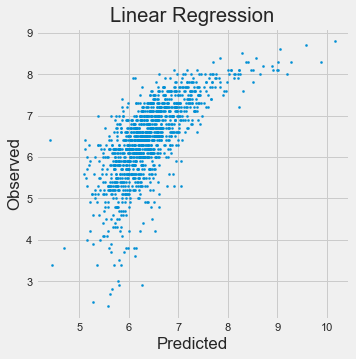

In [26]:
plt.figure(figsize=(5,5));plt.scatter(lm_score_pred, y_score_test,s=4); plt.title("Linear Regression"); plt.xlabel("Predicted"); plt.ylabel("Observed");

# 3. Explanatory component

We have created two questions: in the first one we wanted to know if we can find a correlation between the revenue of only actresses movies and it changes along the years. The other question is if there is an association between the budget size and the number of Votes. We used clustering for this. In order to get the answers needed, while doing the data cleaning, we added the columns mentioned in section 1.3.

<code style="background:yellow;color:black"><b><u><font size="5"> 3.1 Analyzing the perfomance of actresses movies around the years </font></u></b></code>

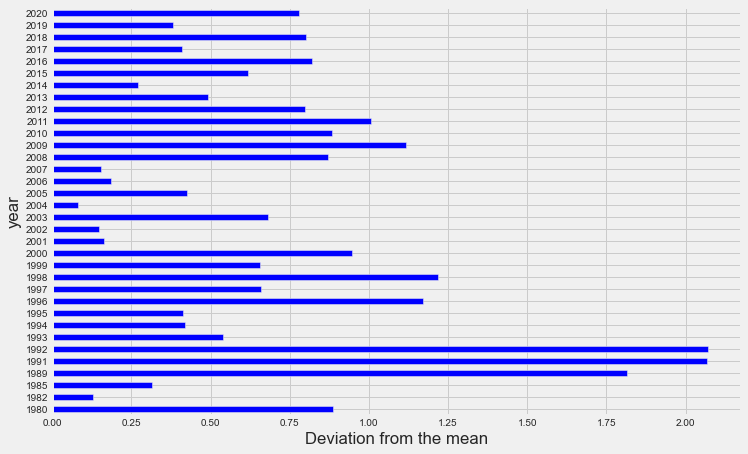

In [27]:
df_actr = df[df['Total_actors'] == 0];m = df.groupby(['year','continent'])['gross'].mean() # Extracting only actresses movies
df_actr=pd.merge(df_actr,m,on=['year','continent']);df_actr["av"] = df_actr["gross_x"].div(df_actr["gross_y"].values); # Getting gross mean for that continent/year
g = df_actr.groupby(['year'])["av"].mean();g.plot(kind="barh", fontsize=10,color='blue');plt.xlabel("Deviation from the mean");# Plotting the selected mean gross movies in comparison with the mean

<code style="background:yellow;color:black"><b><u><font size="5">3.2 Clustering for the budget and numVotes</font></u></b></code>



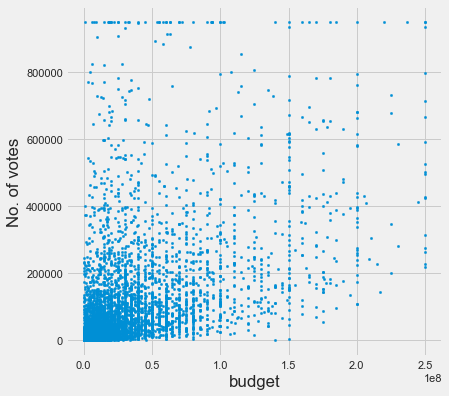

In [46]:
plt.figure(figsize=(6,6));plt.scatter(df.budget,df.numVotes,s=5);plt.xlabel("budget"); plt.ylabel("No. of votes");  # Plotting the budget and No. of votes

In [38]:
feature_variables_clus = ['title','budget'];target_variable_clus= ['numVotes'];df_clus = df[feature_variables_clus].join(df[target_variable_clus]);df_clus.set_index('title', inplace=True)

In [39]:
K=76;k=KMeans(K);k.fit(df_clus);df_clusters=df.copy();df_clusters['cluster']=k.fit_predict(df_clus) # Running kMeans with k=76 (amount of movies with top 10% budget)

In [40]:
davies_bouldin_score(df_clus,df_clusters['cluster'])  # Checking dunn score for the clustering

0.2853985174755091

In [41]:
silhouette_score(df_clus,df_clusters['cluster']) # Checking silhouette score for the clustering

0.770222991459361

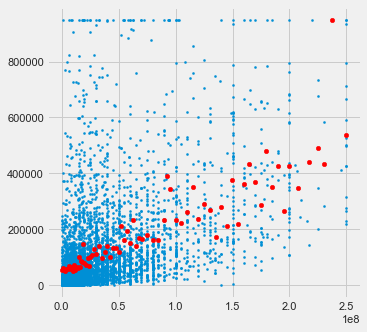

In [45]:
plt.figure(figsize=(5,5));plt.scatter(df.budget,df.numVotes,s=4)
plt.scatter(k.cluster_centers_[:, 0], k.cluster_centers_[:, 1], s=20, c='red'); # Plotting the cluster centers

# 4. Conclusion

In order to study the available data on IMDB we had to get some insights about the film industry, its relevant indicators and trends. Also, we did some research about the dataset and challenge. Then, data preparation and cleaning was needed. This decreased the number of movies significantly, as the dataset had duplicated and empty values.
After analysing the data, it was possible to see that the variables with the most correlation with gross were (in descending order) budget, number of total votes and release year. Similarly, for gross the most correlated variables were number of total votes, runtime and budget.
Next, several models were built and tested. Finally, only two models were considered, we looked at both the r2 score and the Mean absolute error (MAE). For the gross prediction the preferred model is Linear Regression. It had a relatively high r2 score () and the standardized MAE was low (), which confirms the good performance of the model. The score prediction model (classification) had a worse performance, with a r2 score of and a MAE of . This means that the model was not able to predict so accurately the score given the featured variables.
Later on the exploratory component, we tried to answer two questions: -Are the budget and number of votes correlated? -Has the revenue of only actresses' movies gotten higher over the years? For the first question We could see some correlation when clustering the movies with the top 10% budget and total votes as the cluster successfully groups the variables as it has a pretty good silhouette score (). However, the distance between cluster centroids could have been better (dunn score of ). This makes sense, as movies that spend more are more likely to get a higher number of votes. 
On the other hand, we could not find an increase in the revenue of only actresses' movies (in comparison with the rest of the movies) as time went by. Therefore, we cannot prove that there has been an increase in the popularity due to a social more feminist trend.
In conclusion, this project allowed us to analyze the film industry according to the available data on IMDB, which was both challenging because of the complexity of the dataset but also rewarding as good results were achieved afterwards.

Although we included a contribution table with the section that every student was fully responsible, every member of the group took part in each section of the whole project since it was treated as a group project.

 # Individual Contributions Table

In [47]:
contribution.head()

,Section,Name,Student Number
Introduction + Data analysis + Data Extraction + Cleaning & visualization,Section 1,Sana Ulah Khan,S203133
Prediction Challenge,Section 2,Leandro Martin Corona,S214136
Exploratory Component,Section 3,Zoltán György Varga,S212904
Conclusions,Section 4,Paulo Gonzalez Isaurralde,S213626
